# **Author: Sarthak Jain**


**THE SPARKS FOUNDATION INTERNSHIP**

**GRIPFEB21**

**Task1: Prediction using Supervised Machine Learning**

**Problem Statement: Predict the percentage of a student based on the number of his/her study hours.**


**Following steps will be performed by me:-**

*  Data reading and understanding
*  Exploratory Data Analysis
*  Building a Simple Regression Model
*  Model Evaluation and Prediction

# **Simple Linear Regression**

**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.**

In [21]:
# Importing all libraries required in this notebook

import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
%matplotlib inline

In [22]:
# Reading data from remote link

data = pandas.read_csv("http://bit.ly/w-data")
print("Imported data is as follows:")

data.head(25)

Imported data is as follows:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


***Checking for NULL values***

In [23]:
data.isnull == True

False

***In order to find relation between the data we will plot the data points on 2D graph.***

# **Exploratory Data Analysis:**

***Plotting our data points on 2D graph.***

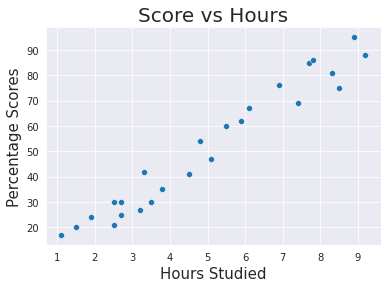

In [24]:
# Plotting the distribution of scores

seaborn.set_style('darkgrid')
seaborn.scatterplot(y = data['Scores'], x = data['Hours'])
plt.title('Score vs Hours', size = 20)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Percentage Scores', size=15)
plt.show()

***From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.***

# **Plotting Regression line:**

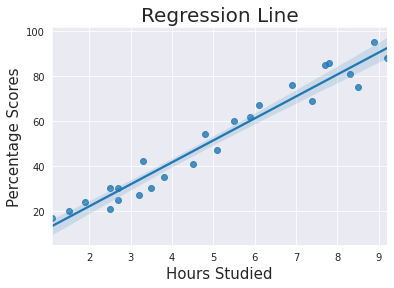

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [25]:
seaborn.regplot(x = data['Hours'], y = data['Scores'])
plt.title('Regression Line', size = 20)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Percentage Scores', size=15)
plt.show()
print(data.corr())

# **Preparing the data:**

***Now we will divide the data into "attributes" (inputs) and "labels" (outputs).***

In [26]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

# **Splitting the data:**

***Now we will split this data into training and test sets using attributes and labels.***

In [28]:
#splitting our data into training and testing sets

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

# **Training the Algorithm:**

***We have split our data into training and testing sets, and now is finally the time to train our algorithm.***

In [30]:
regression = LinearRegression()
regression.fit(train_X, train_y)

print("Model is trained.")

Model is trained.


# **Predicting the Percentage:**

***Now that we have trained our algorithm, it's time to make some predictions.***

In [31]:
pred_y = regression.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# **Comparing the Actual and Predicted Marks:**

In [32]:
# Comparing Actual vs Predicted

df = pandas.DataFrame({'Actual': test_y, 'Predicted' : pred_y})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# **Plotting Actual and Predicted Marks:**

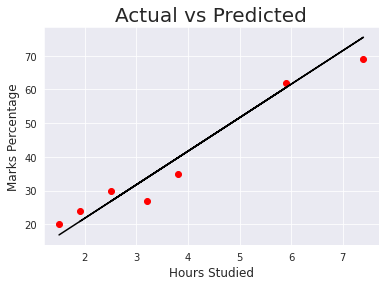

In [33]:
plt.scatter(x=test_X, y=test_y, color='Red')
plt.plot(test_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# **Predicting the score for studying 9.25 hours per day:**

In [34]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


# **According to linear regression model, predicted score if a student studies for 9.25 hours per day is 93.893**

# **Evaluating the model:**

***The final step is to evaluate the performance of algorithm using mean square error.***

In [35]:
#mean absolute error to evaluate performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred_y))

Mean Absolute Error: 4.130879918502482
